<a href="https://colab.research.google.com/github/juliosdutra/Topicos-de-Controle-Avancado-UFES/blob/main/Resposta_ao_degrau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/cabe%C3%A7alho-geral.jpg?raw=true" width="700" height="175">
</left>

In [2]:
! pip install -qq control sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 7.4 MB/s eta 0:00:00


In [9]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import pandas as pd

# Sistema de primeira ordem:

$$G(s)=\frac{1}{5s+1}$$

In [29]:
# Especificação do sistema
Kp = 1 # Ganho estacionário
tau = 5 # Constante de tempo
Ts = 2.5 # Tempo de amostragem (sampling)
G1 = ct.tf([Kp],[tau,1])
print(G1)


   1
-------
5 s + 1



In [30]:
# Resposta ao degrau unitário
tsimu = np.arange(start=0, stop=25+Ts, step=Ts)
N = len(tsimu)
sample = range(N) # Número da amostragem
u = np.ones(N) # Variável de entrada
t, y = ct.step_response(G1, T=tsimu)

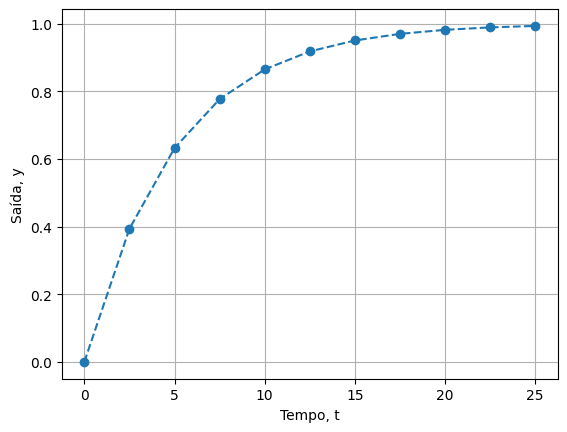

In [31]:
plt.plot(t, y, 'o--')
plt.xlabel('Tempo, t')
plt.ylabel('Saída, y')
plt.grid()

In [32]:
dados = {'Amostragem': sample, 'Tempo':t, 'Entrada u': u, 'Saída y': y}
df = pd.DataFrame(dados)
df

,Amostragem,Tempo,Entrada u,Saída y
0,0,0.0,1.0,0.000000
1,1,2.5,1.0,0.393469
2,2,5.0,1.0,0.632121
3,3,7.5,1.0,0.776870
4,4,10.0,1.0,0.864665
5,5,12.5,1.0,0.917915
6,6,15.0,1.0,0.950213
7,7,17.5,1.0,0.969803
8,8,20.0,1.0,0.981684
9,9,22.5,1.0,0.988891


# Sistema de primeira ordem com tempo-morto:

$$G(s)=\frac{e^{-5s}}{5s+1} $$

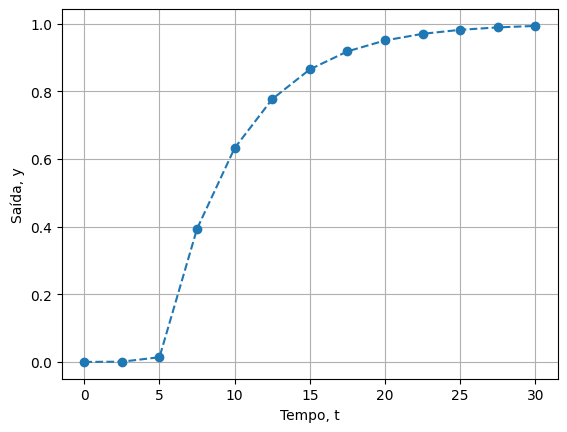

In [62]:
# Especificação do sistema
theta = 5
G2 = G1*ct.tf(*ct.pade(5,12,12))

# Resposta ao degrau
tsimu = np.arange(start=0, stop=25+Ts+theta, step=Ts)
N = len(tsimu)
sample = range(N) # Número da amostragem
u = np.ones(N) # Variável de entrada
t, y = ct.step_response(G2, T=tsimu)

# Saída gráfica
plt.plot(t, y, 'o--')
plt.xlabel('Tempo, t')
plt.ylabel('Saída, y')
plt.grid()

In [63]:
dados2 = {'Amostragem': sample, 'Tempo':t, 'Entrada u': u, 'Saída y': y}
df2 = pd.DataFrame(dados2)
df2

,Amostragem,Tempo,Entrada u,Saída y
0,0,0.0,1.0,0.000000
1,1,2.5,1.0,0.000701
2,2,5.0,1.0,0.013896
3,3,7.5,1.0,0.393578
4,4,10.0,1.0,0.632115
5,5,12.5,1.0,0.776870
6,6,15.0,1.0,0.864665
7,7,17.5,1.0,0.917915
8,8,20.0,1.0,0.950213
9,9,22.5,1.0,0.969803
